# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df_original= pd.read_csv('imputed_dataset.csv')
df_original.head()

,sex,ee_zn_myasthener_exazerbation,zn_myasthener_krise,mgfaklassifikation_schlimmste_historisch,mgfaklassifikation_schlimmste_historisch_1bis5,aktueller_mgfa_score,MGFA_umkodiert_betonung,mgfa_aktuell_1bis5,ee_autoimmunerkrankungen_rbzu,okulaer,...,schwerbehinderung,age,age_erst,age_diag,time_erst_to_diag,dauer,scoreqmg_neu,chronicfatigue_neu,scoreqol_neu,scoreadl_neu
0,0,0,1,8,5,3,3,2,0,0,...,2,34.961111,17.583333,17.750000,0.166667,17.377778,0.000000,9.750000,1.0,2.000
1,1,0,0,2,2,2,2,2,1,1,...,0,59.711111,55.750000,58.916667,3.166667,3.961111,1.000000,16.500000,5.5,1.125
2,1,1,0,5,3,2,2,2,1,1,...,2,83.344444,80.666667,80.916667,0.250000,2.677778,5.000000,12.000000,7.0,3.000
3,1,0,0,2,2,2,2,2,1,1,...,0,56.505556,56.166667,56.250000,0.083333,0.338889,4.000000,8.000000,17.6,4.600
4,0,0,0,5,3,3,3,2,1,1,...,0,39.986111,21.083333,21.083333,0.000000,18.902778,4.333333,12.666667,10.0,1.000


# Correlation Heatmap Matrix

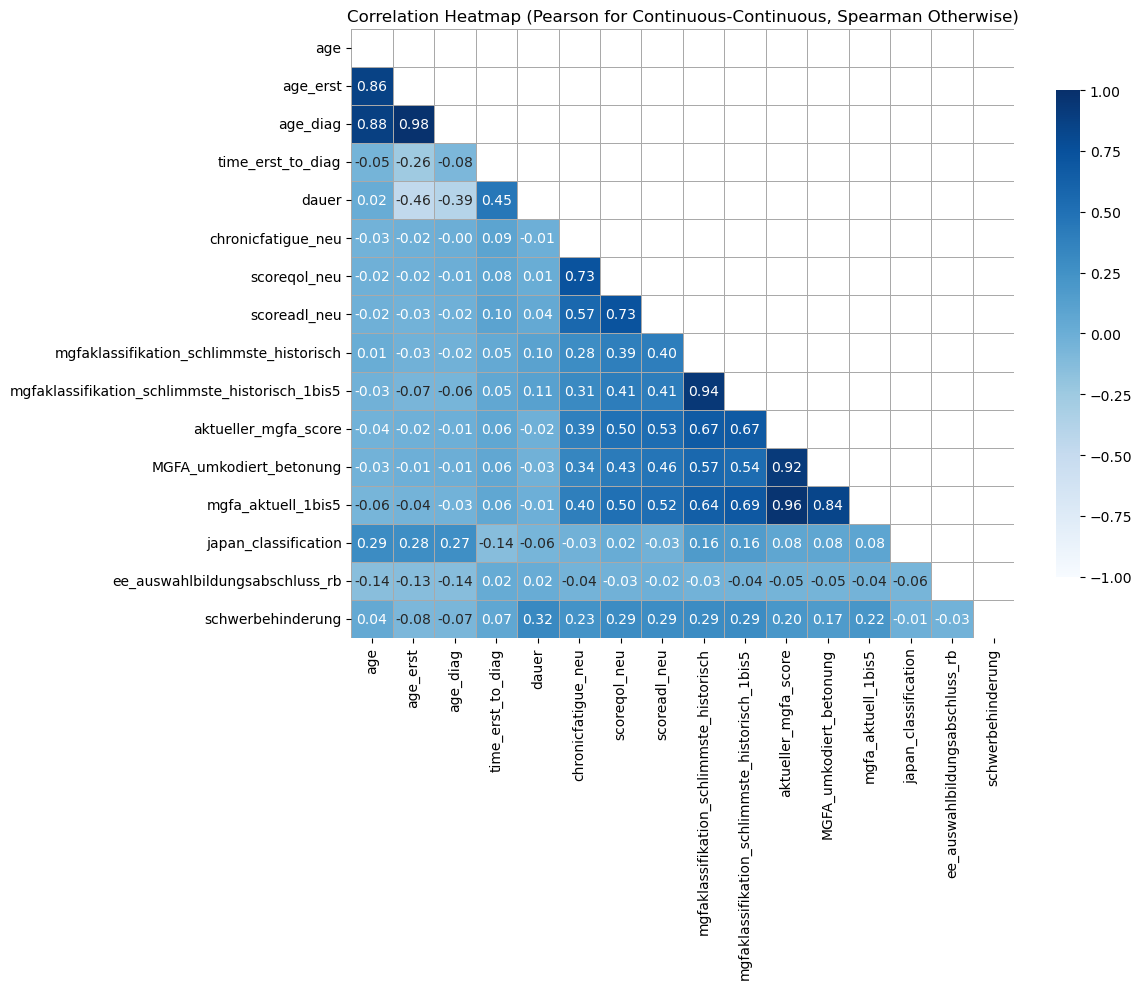

In [3]:
# Define continuous and ordinal variables
continuous_vars = ['age', 'age_erst', 'age_diag', 'time_erst_to_diag', 'dauer', 'chronicfatigue_neu', 'scoreqol_neu', 'scoreadl_neu']

ordinal_vars = ['mgfaklassifikation_schlimmste_historisch', 'mgfaklassifikation_schlimmste_historisch_1bis5', 'aktueller_mgfa_score', 'MGFA_umkodiert_betonung', 
                'mgfa_aktuell_1bis5', 'japan_classification', 'ee_auswahlbildungsabschluss_rb', 'schwerbehinderung']

# Compute Pearson correlation for continuous variables
pearson_corr = df_original[continuous_vars].corr(method='pearson')

# Compute Spearman correlation for all variables
spearman_corr = df_original[continuous_vars + ordinal_vars].corr(method='spearman')

# Initialize the final correlation matrix with Spearman values
combined_corr = spearman_corr.copy()

# Replace continuous-continuous pairs with Pearson correlation values
for var1 in continuous_vars:
    for var2 in continuous_vars:
        if var1 != var2:
            combined_corr.loc[var1, var2] = pearson_corr.loc[var1, var2]

# Create a mask for the upper triangle to avoid redundancy in the heatmap
mask = np.triu(np.ones_like(combined_corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    combined_corr, mask=mask, cmap="Blues", vmin=-1, vmax=1, annot=True, fmt=".2f",
    cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='darkgrey'
)

plt.title("Correlation Heatmap (Pearson for Continuous-Continuous, Spearman Otherwise)")
plt.tight_layout()
plt.show()

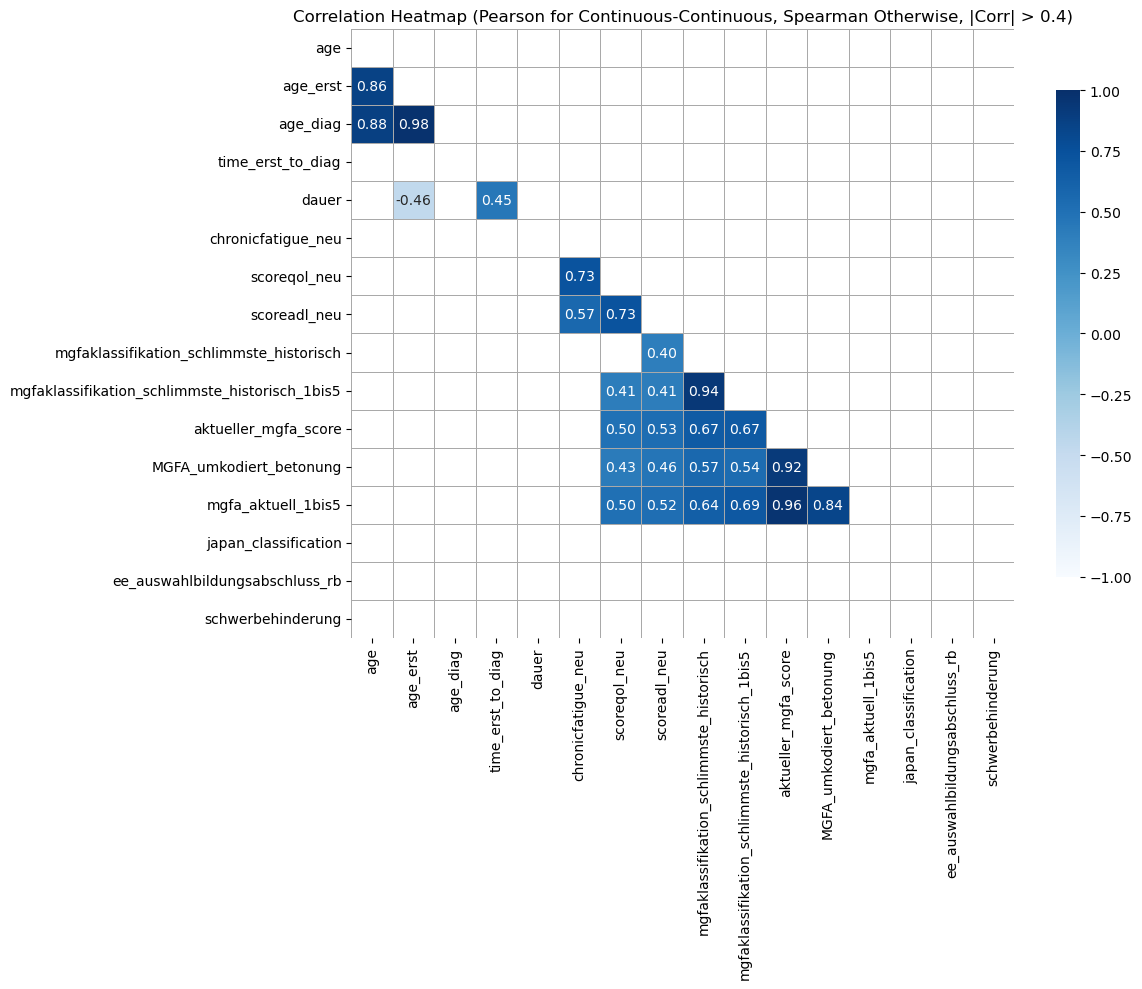

In [4]:
# Define continuous and ordinal variables
continuous_vars = ['age', 'age_erst', 'age_diag', 'time_erst_to_diag', 'dauer', 'chronicfatigue_neu', 'scoreqol_neu', 'scoreadl_neu']

ordinal_vars = ['mgfaklassifikation_schlimmste_historisch', 'mgfaklassifikation_schlimmste_historisch_1bis5', 'aktueller_mgfa_score', 'MGFA_umkodiert_betonung', 
                'mgfa_aktuell_1bis5', 'japan_classification', 'ee_auswahlbildungsabschluss_rb', 'schwerbehinderung']

# Compute Pearson correlation for continuous variables
pearson_corr = df_original[continuous_vars].corr(method='pearson')

# Compute Spearman correlation for all variables
spearman_corr = df_original[continuous_vars + ordinal_vars].corr(method='spearman')

# Initialize the final correlation matrix with Spearman values
combined_corr = spearman_corr.copy()

# Replace continuous-continuous pairs with Pearson correlation values
for var1 in continuous_vars:
    for var2 in continuous_vars:
        if var1 != var2:
            combined_corr.loc[var1, var2] = pearson_corr.loc[var1, var2]

# Filter for correlations with absolute values greater than 0.4
filtered_corr = combined_corr[(combined_corr > 0.4) | (combined_corr < -0.4) & (combined_corr != 1.0)]

# Create a mask for the upper triangle to avoid redundancy in the heatmap
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, mask=mask, cmap="Blues", vmin=-1, vmax=1, annot=True, fmt=".2f", cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='darkgrey')

plt.title("Correlation Heatmap (Pearson for Continuous-Continuous, Spearman Otherwise, |Corr| > 0.4)")
plt.tight_layout()
plt.show()

# Scatter Pairplot of Continuous & Ordinal Variables

<Figure size 1200x1000 with 0 Axes>

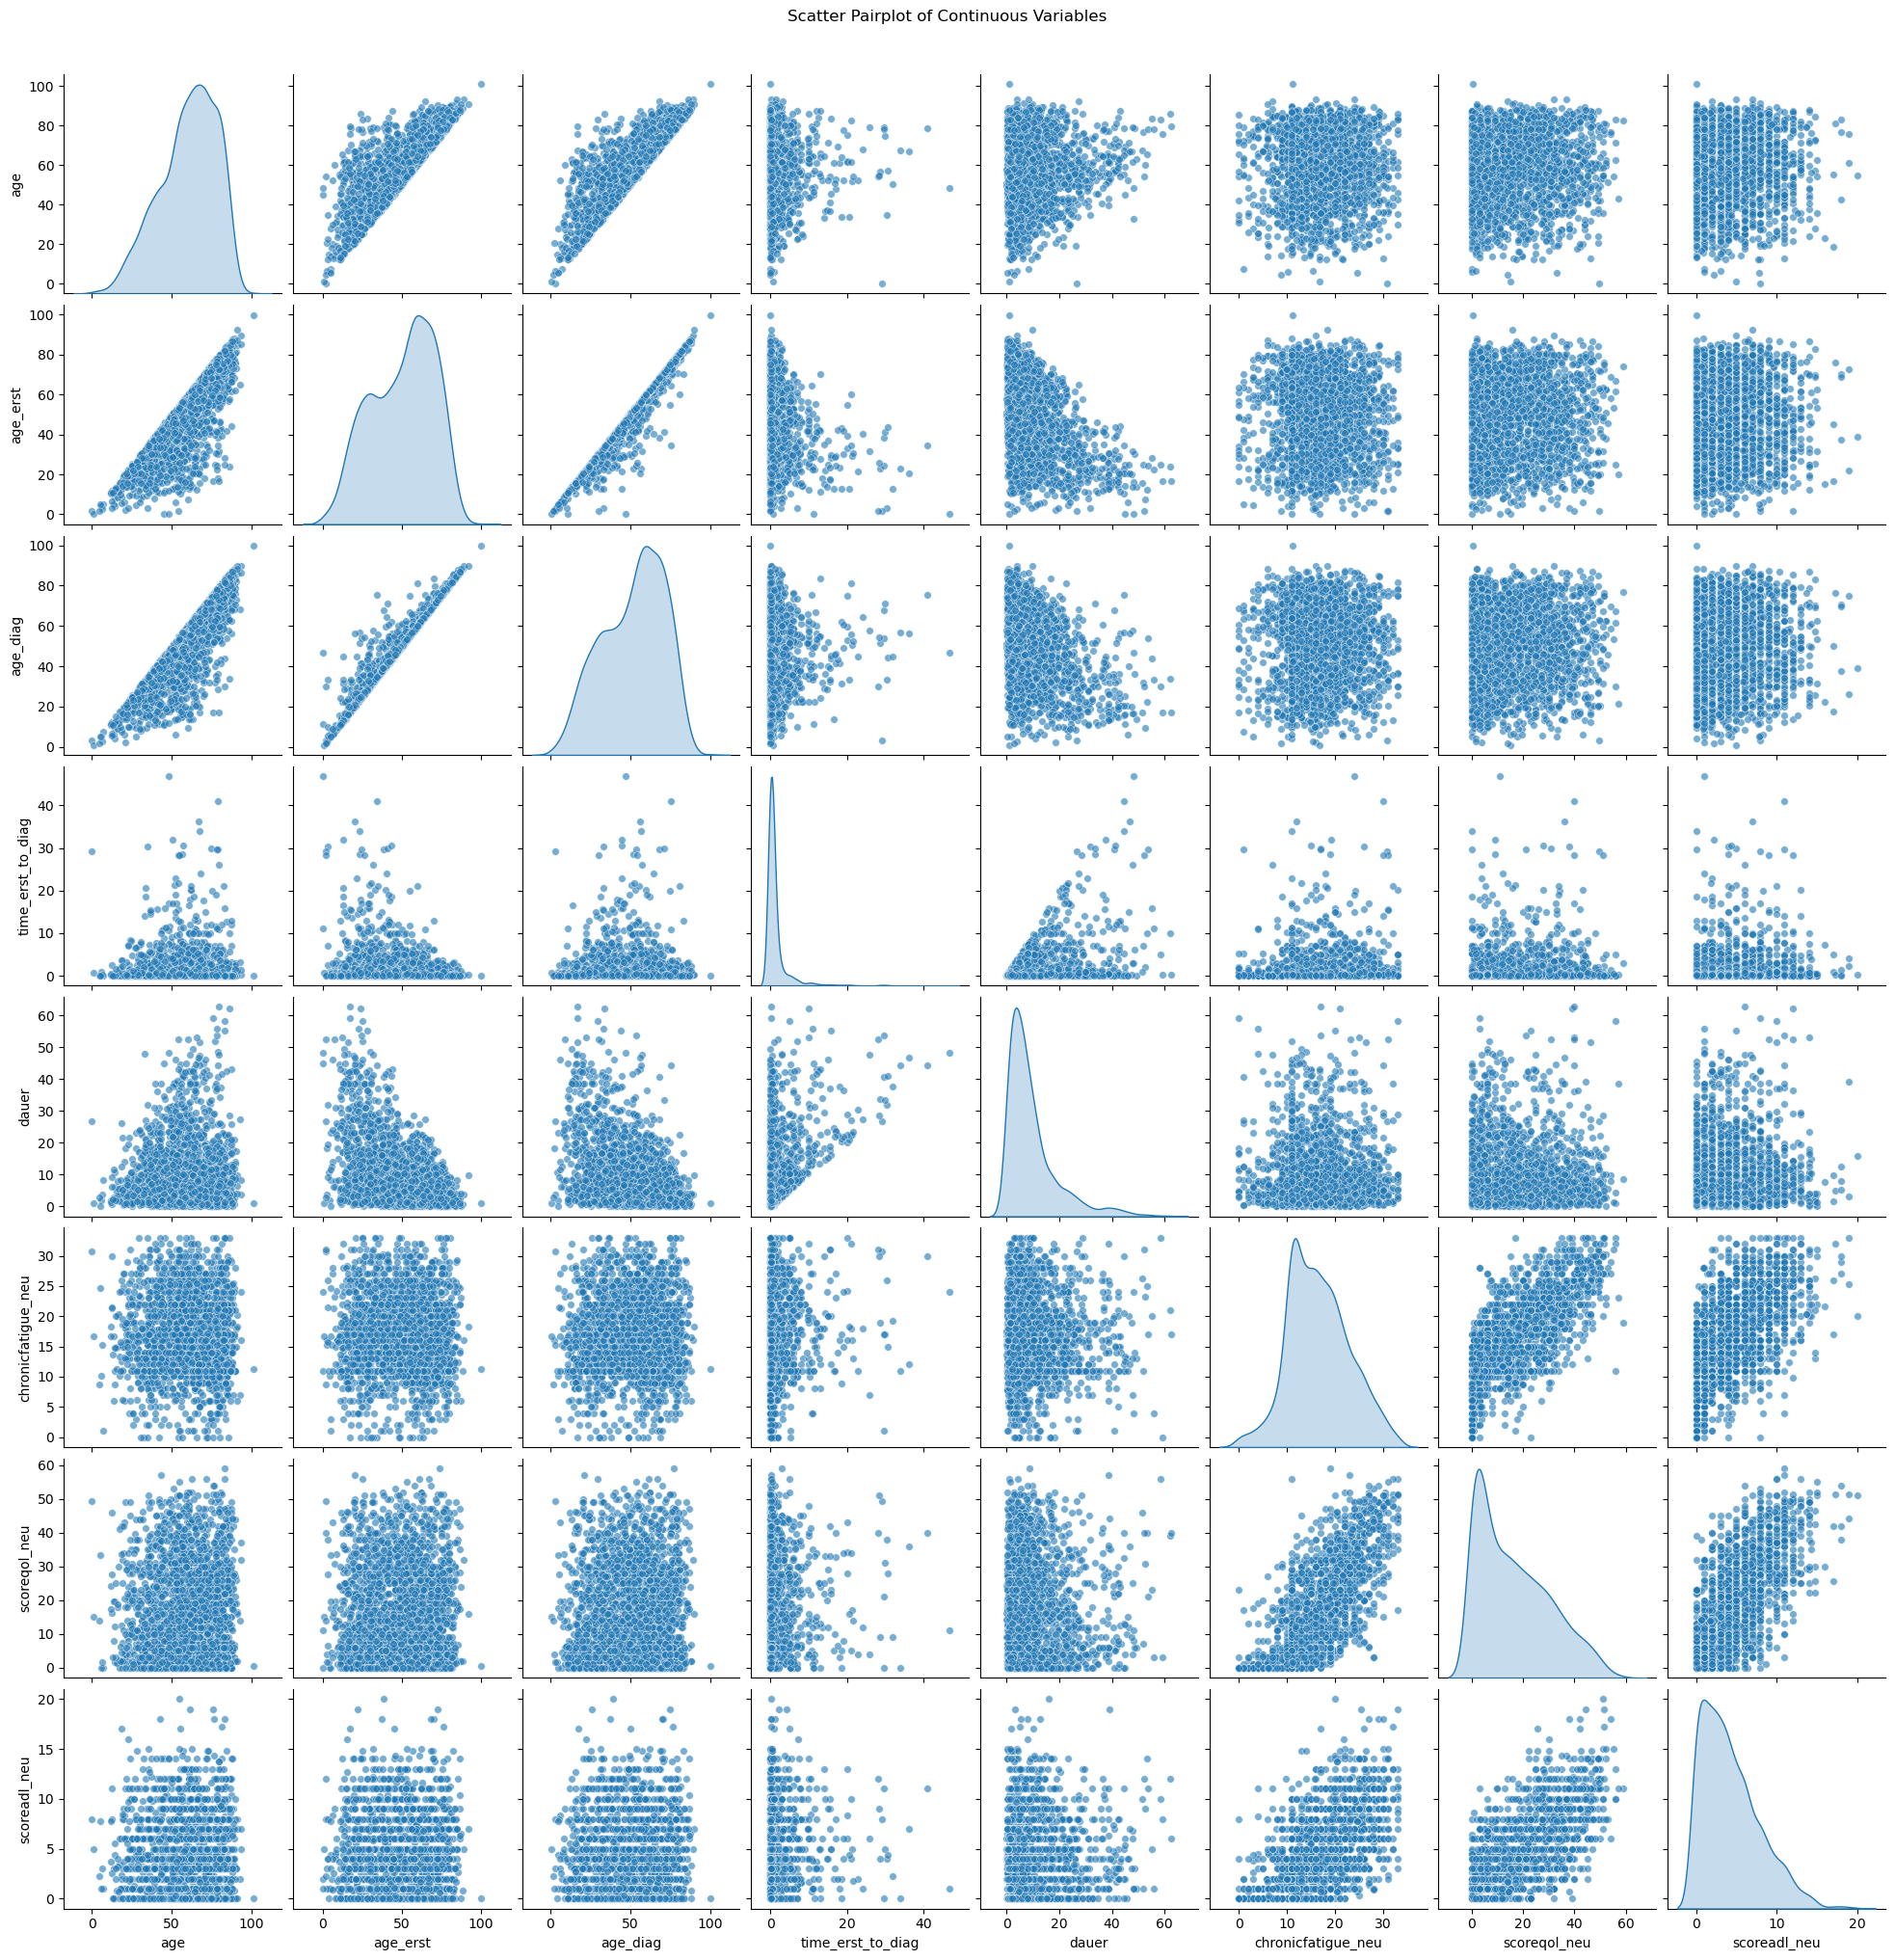

In [5]:
# Plot pairplot for continuous variables
plt.figure(figsize=(12, 10))
sns.pairplot(df_original[continuous_vars], diag_kind="kde", plot_kws={'alpha':0.6, 's':30})
plt.suptitle("Scatter Pairplot of Continuous Variables", y=1.02)
plt.show()

<Figure size 1200x1000 with 0 Axes>

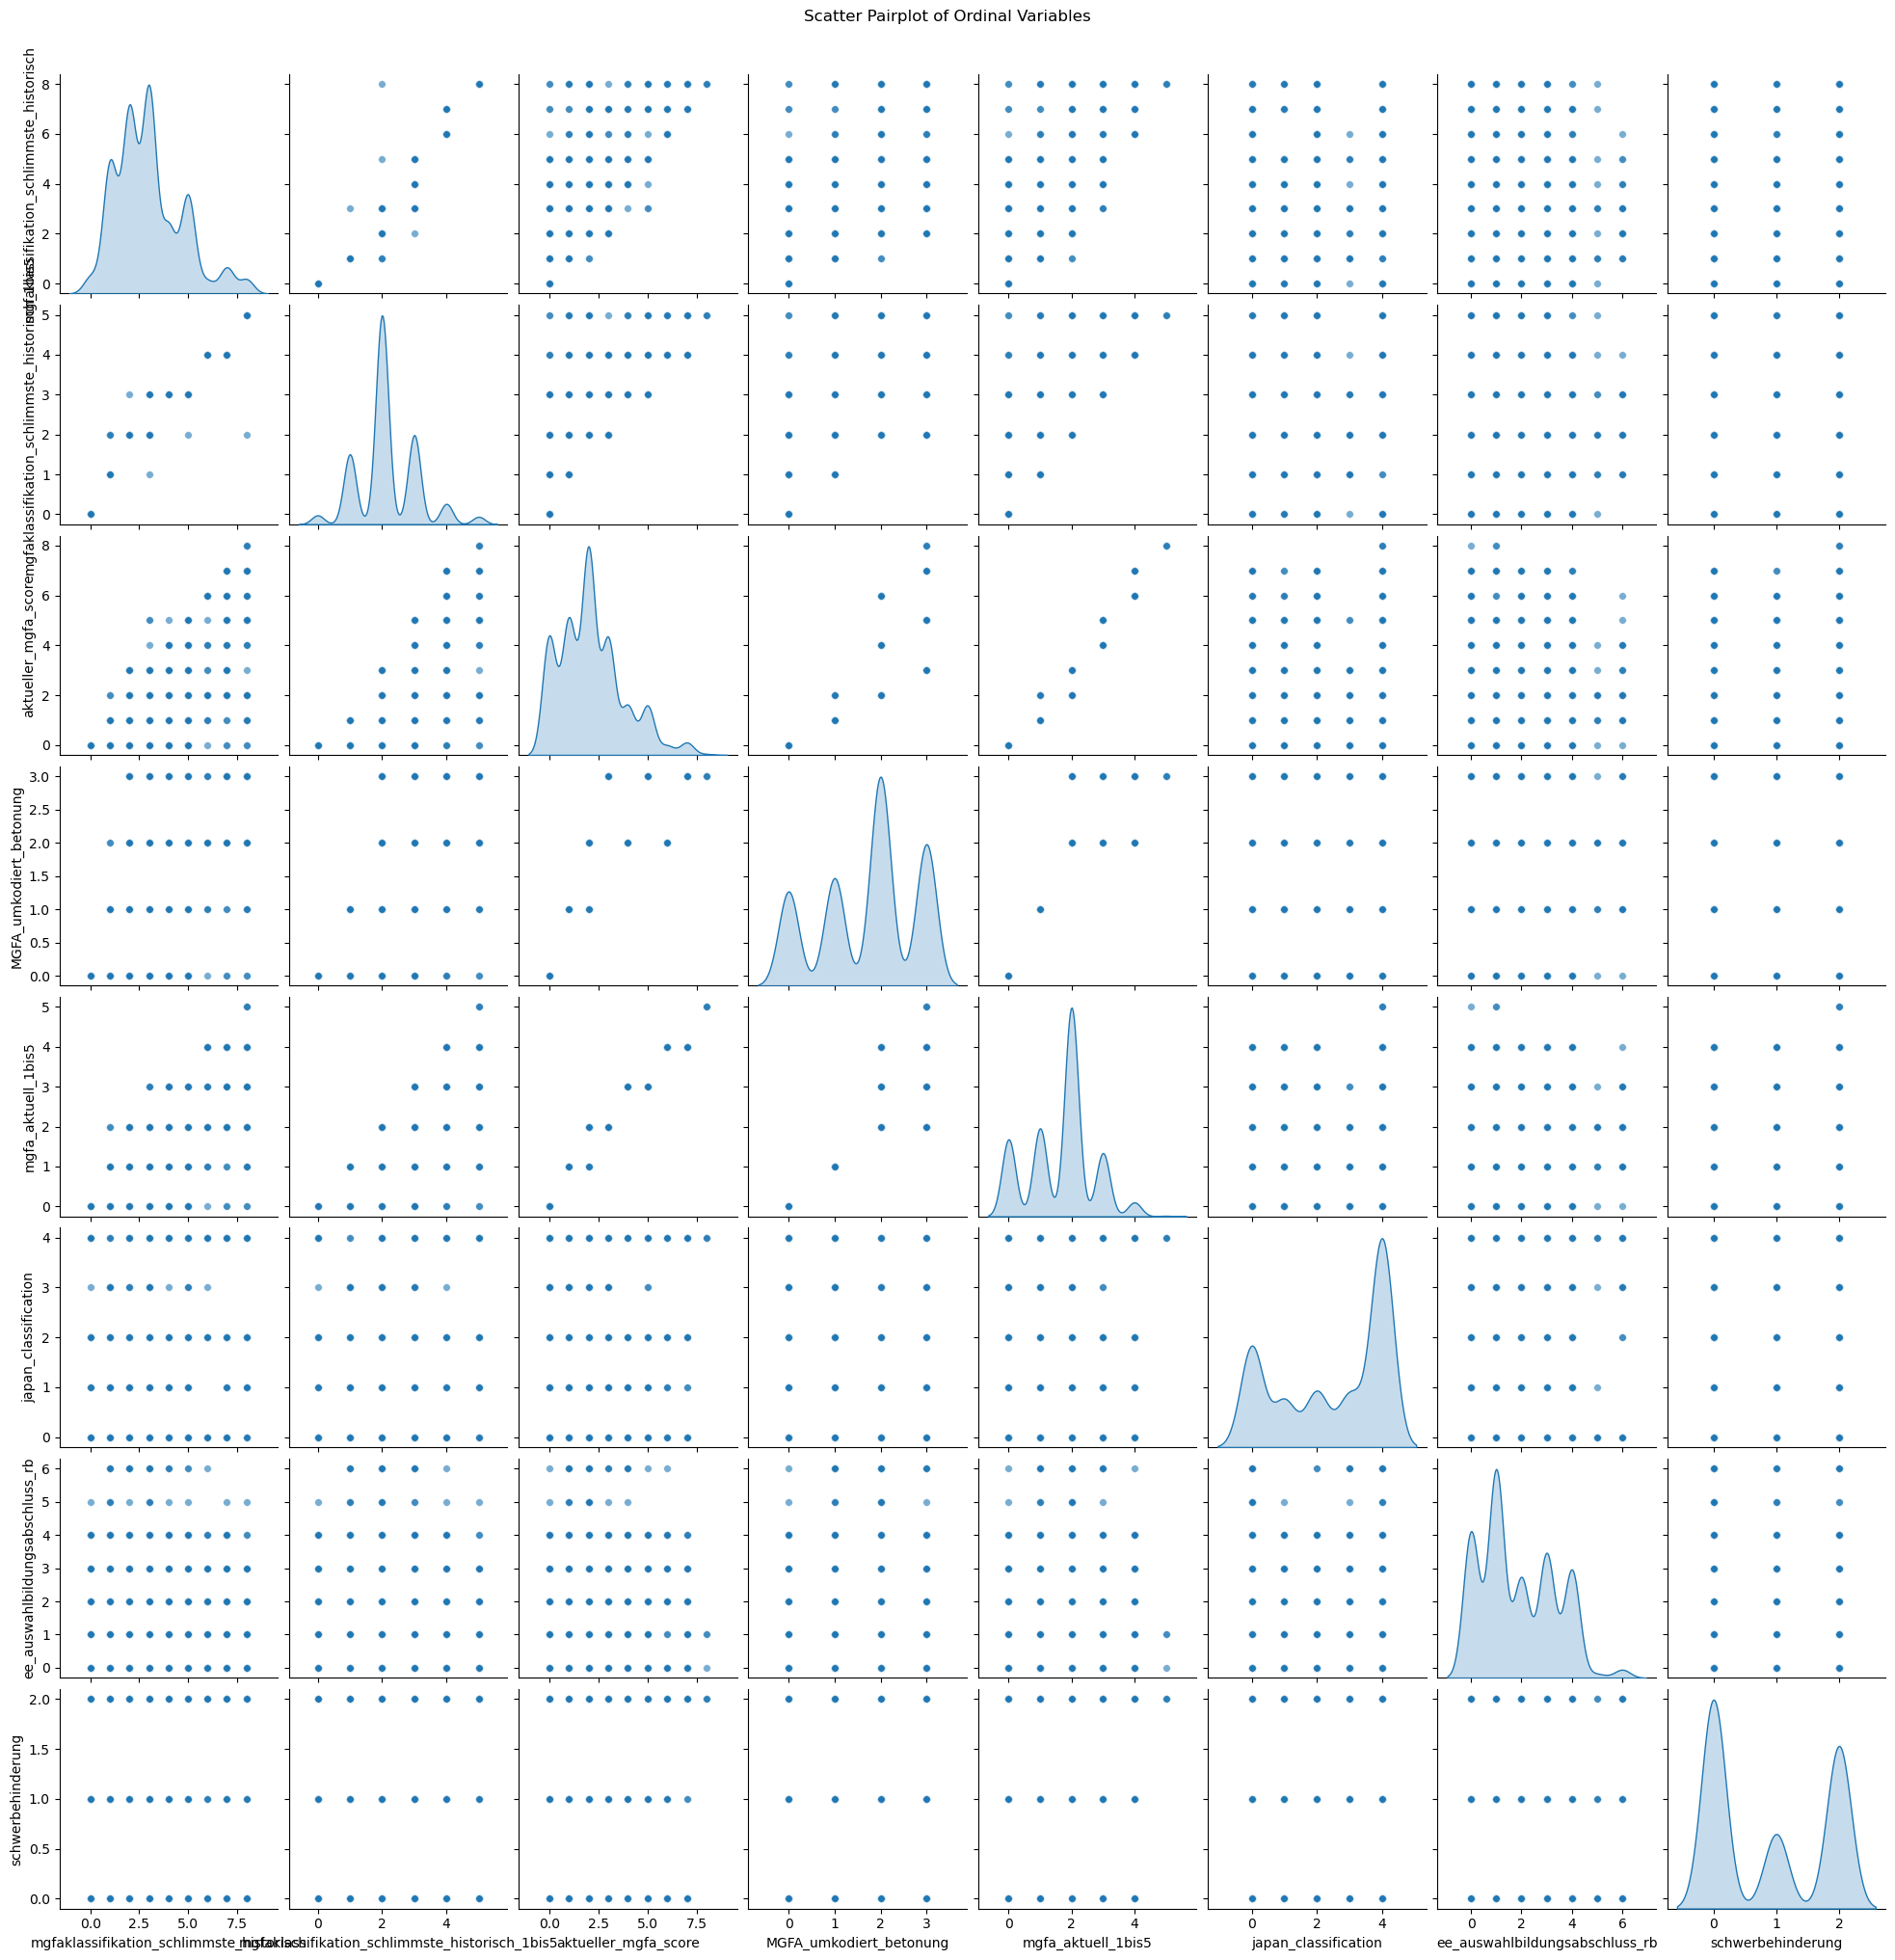

In [6]:
# Plot pairplot for Ordinal variables
plt.figure(figsize=(12, 10))
sns.pairplot(df_original[ordinal_vars], diag_kind="kde", plot_kws={'alpha':0.6, 's':30})
plt.suptitle("Scatter Pairplot of Ordinal Variables", y=1.02)
plt.show()